In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 727kB 10.8MB/s 
     |████████████████████████████████| 194kB 13.0MB/s 
     |████████████████████████████████| 1.1MB 18.0MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
Mounted at /content/gdrive


In [2]:
lung_types = 'NORMAL','PNEUMONIA'
path = Path('/content/gdrive/My Drive/ReplicateFiles/train')

In [3]:
lungs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms = Resize(256)
)

dls = lungs.dataloaders(path)

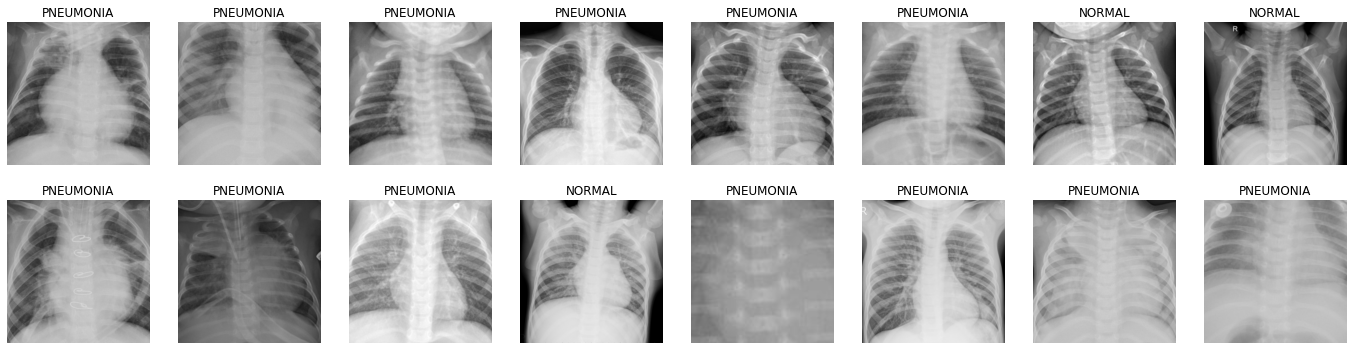

In [4]:
dls.valid.show_batch(max_n=16, nrows=2)

In [6]:
learn = cnn_learner(dls, resnet152, metrics=accuracy)
learn.fine_tune(25)

epoch,train_loss,valid_loss,accuracy,time
0,0.377244,0.283774,0.934880,22:39


epoch,train_loss,valid_loss,accuracy,time
0,0.135824,0.122820,0.973238,02:16
1,0.072202,0.075846,0.979483,02:16
2,0.052435,0.075500,0.977699,02:16
3,0.064358,0.151947,0.966994,02:16
4,0.063780,0.031874,0.990187,02:17
5,0.042974,0.053452,0.983943,02:16
6,0.042032,0.065099,0.983943,02:16
7,0.034436,0.075654,0.980375,02:17
8,0.027061,0.079228,0.983943,02:16
9,0.035670,0.073114,0.975022,02:16


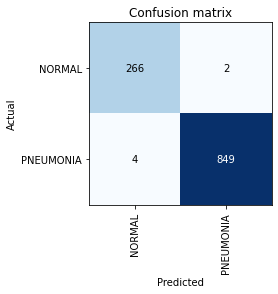

In [7]:
#delete later lol

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

This is to export the model:

In [8]:
learn.export()

In [9]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [10]:
learn_inf = load_learner(path/'export.pkl')

In [11]:
learn_inf.predict('/content/gdrive/MyDrive/ReplicateFiles/test/PNEUMONIA/person100_bacteria_481.jpeg')


('PNEUMONIA', tensor(1), tensor([5.4782e-05, 9.9995e-01]))